In [ ]:
!pip install -q git+https://github.com/huggingface/peft.git transformers bitsandbytes datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00


In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("zoheb/sketch-scene", split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/9999 [00:00<?, ? examples/s]

In [ ]:
texts = dataset_resize['text']

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
noun_tokens = []

for text in texts:
    # Tokenize the text
    tokens = word_tokenize(text)

    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)

    # Extract nouns from the tagged tokens
    nouns = [token for token, pos in tagged_tokens if pos.startswith('NN')]

    # Add the nouns to the noun_tokens list
    noun_tokens.extend(nouns)

print(noun_tokens)

['cows', 'mountains', 'Sheeps', 'grass', 'front', 'house', 'building', 'road', 'side', 'dog', 'frisbee', 'Animals', 'field', 'hills', 'plane', 'sky', 'motorbike', 'highway', 'roadside', 'Men', 'horses', 'race', 'ground', 'Girl', 'bench', 'day', 'road', 'man', 'picnic', 'table', 'songs', 'radio', 'cow', 'farm', 'bus', 'road', 'girl', 'umbrella', 'zebra', 'field', 'Cows', 'meadow', 'trees', 'Elephants', 'forest', 'plane', 'sky', 'train', 'track', 'area', 'people', 'farm', 'bird', 'structure', 'tree', 'aircrafts', 'sky', 'Airplane', 'sky', 'Elephant', 'jungle', 'Man', 'skates', 'pole', 'clock', 'chicks', 'grass', 'people', 'bench', 'giraffe', 'grass', 'Man', 'fire', 'aeroplane', 'sky', 'Giraffe', 'space', 'air', 'balloons', 'sky', 'person', 'glasses', 'grass', 'man', 'photo', 'stunt', 'field', 'peoples', 'elephant', 'truck', 'road', 'giraffe', 'space', 'jet', 'runway', 'giraffe', 'forest', 'mountains', 'man', 'house', 'roof', 'building', 'clock', 'cow', 'grazing', 'field', 'mountain', 'gr

In [ ]:
#다 소문자로 변환
noun_word = [word.lower() for word in noun_tokens]

print(noun_word)

['cows', 'mountains', 'sheeps', 'grass', 'front', 'house', 'building', 'road', 'side', 'dog', 'frisbee', 'animals', 'field', 'hills', 'plane', 'sky', 'motorbike', 'highway', 'roadside', 'men', 'horses', 'race', 'ground', 'girl', 'bench', 'day', 'road', 'man', 'picnic', 'table', 'songs', 'radio', 'cow', 'farm', 'bus', 'road', 'girl', 'umbrella', 'zebra', 'field', 'cows', 'meadow', 'trees', 'elephants', 'forest', 'plane', 'sky', 'train', 'track', 'area', 'people', 'farm', 'bird', 'structure', 'tree', 'aircrafts', 'sky', 'airplane', 'sky', 'elephant', 'jungle', 'man', 'skates', 'pole', 'clock', 'chicks', 'grass', 'people', 'bench', 'giraffe', 'grass', 'man', 'fire', 'aeroplane', 'sky', 'giraffe', 'space', 'air', 'balloons', 'sky', 'person', 'glasses', 'grass', 'man', 'photo', 'stunt', 'field', 'peoples', 'elephant', 'truck', 'road', 'giraffe', 'space', 'jet', 'runway', 'giraffe', 'forest', 'mountains', 'man', 'house', 'roof', 'building', 'clock', 'cow', 'grazing', 'field', 'mountain', 'gr

In [ ]:
# 불용어
stopwords = ['s','a', 'the','in', 'a', 'drawing']

In [ ]:
# 불용어 제거 후 빈도분석
noun_word=[word for word in noun_word if word not in stopwords]

c= Counter(noun_word)

c.most_common(100)

[('grass', 90),
 ('sky', 83),
 ('man', 76),
 ('road', 58),
 ('people', 53),
 ('field', 52),
 ('board', 46),
 ('ground', 45),
 ('giraffe', 43),
 ('sign', 41),
 ('clock', 39),
 ('dog', 38),
 ('train', 38),
 ('plane', 37),
 ('pole', 35),
 ('park', 35),
 ('kite', 34),
 ('trees', 33),
 ('boy', 31),
 ('zebra', 30),
 ('person', 28),
 ('traffic', 28),
 ('frisbee', 26),
 ('forest', 26),
 ('tree', 26),
 ('giraffes', 26),
 ('horse', 26),
 ('tower', 25),
 ('standing', 25),
 ('cows', 24),
 ('zebras', 23),
 ('disc', 22),
 ('front', 21),
 ('garden', 21),
 ('bench', 20),
 ('building', 19),
 ('jungle', 19),
 ('aeroplane', 19),
 ('water', 19),
 ('side', 18),
 ('elephant', 18),
 ('runway', 17),
 ('girl', 16),
 ('cow', 16),
 ('bus', 16),
 ('bird', 16),
 ('airplane', 16),
 ('birds', 15),
 ('river', 15),
 ('sheep', 15),
 ('elephants', 14),
 ('signal', 14),
 ('animals', 13),
 ('truck', 13),
 ('direction', 13),
 ('kites', 13),
 ('house', 12),
 ('area', 12),
 ('street', 12),
 ('land', 12),
 ('car', 12),
 ('hor

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud # 워드 클라우드 라이브러리 설치
word_dict = dict(c.most_common(100)) # 딕셔너리 형태로 변환

mask = np.array(Image.open('dw.jpeg'))
# 워드클라우드 설정하기
wc = WordCloud(background_color= 'white',
               width = 3500, height = 2500,
               min_font_size = 5,
               mask=mask) #setting

cloud = wc.generate_from_frequencies(word_dict) # 딕셔너리 형태로 저장

(-0.5, 611.5, 611.5, -0.5)

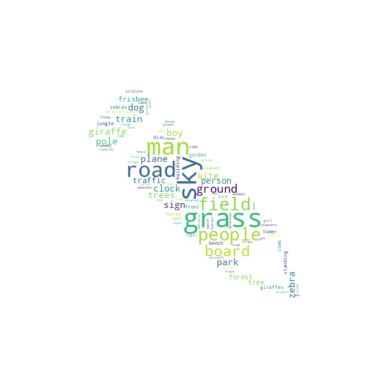

In [ ]:
# 워드 클라우드 출력하기
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
data_one_path = "/content/drive/MyDrive/quickdraw_one"

In [ ]:
from PIL import Image
import os
import numpy as np
from datasets import Dataset, concatenate_datasets

In [ ]:
class_names = [filename.split(".")[0] for filename in os.listdir(data_one_path)]
images = []
texts = []

In [ ]:
for class_name in class_names:
    image_path = os.path.join(data_one_path, f"{class_name}.png")
    image = Image.open(image_path)
    images.append(image)
    texts.append(f"A drawing of a {class_name}")

In [ ]:
new_dataset = Dataset.from_dict({
    "image": images,
    "text": texts
})

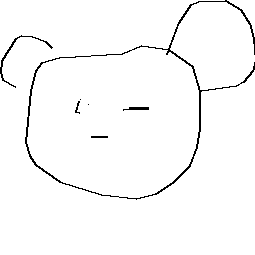

In [ ]:
new_dataset[9]["image"]

In [ ]:
new_dataset[9]["text"]

'A drawing of a bear'

In [ ]:
dataset[0]["text"]

'giraffe is eating leaves from the tree'

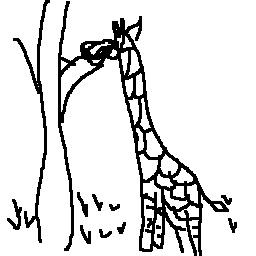

In [ ]:
dataset[0]["image"]

In [ ]:
from torch.utils.data import Dataset, DataLoader

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        encoding["text"] = item["text"]
        return encoding

def collate_fn(batch):
    # pad the input_ids and attention_mask
    processed_batch = {}
    for key in batch[0].keys():
        if key != "text":
            processed_batch[key] = torch.stack([example[key] for example in batch])
        else:
            text_inputs = processor.tokenizer(
                [example["text"] for example in batch], padding=True, return_tensors="pt"
            )
            processed_batch["input_ids"] = text_inputs["input_ids"]
            processed_batch["attention_mask"] = text_inputs["attention_mask"]
    return processed_batch

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("ybelkada/blip2-opt-2.7b-fp16-sharded", device_map="auto", load_in_8bit=True)

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
from peft import LoraConfig, get_peft_model

# Let's define the LoraConfig
config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    target_modules=["q_proj", "k_proj"]
)

model = get_peft_model(model, config)
model.print_trainable_parameters()


trainable params: 5,242,880 || all params: 3,749,922,816 || trainable%: 0.13981301102065136


In [ ]:
#랜덤으로 샘플 몇 개 고르고 싶은지 여기서 바꾸면 됩니당...
import random
from torch.utils.data import Dataset, DataLoader


num_samples = 1000


random_indices = random.sample(range(len(dataset)), num_samples)


selected_dataset = [dataset[idx] for idx in random_indices]


In [ ]:
from PIL import Image
import numpy as np
from datasets import Dataset, Features, Value, DatasetDict

In [ ]:
# Convert the list of dictionaries into a dataset
converted_data = [{'image': data['image'], 'text': data['text']} for data in selected_dataset]
converted_dataset = Dataset.from_dict({'image': [item['image'] for item in converted_data],
                                      'text': [item['text'] for item in converted_data]})


In [ ]:
from datasets import Dataset, concatenate_datasets
final_dataset = concatenate_datasets([converted_dataset, new_dataset])

In [ ]:
len(final_dataset)

1345

In [ ]:
# data resizing

def transforms(examples):
    examples["pixel_values"] = [image.convert("RGB").resize((100,100)) for image in examples["image"]]
    return examples

In [ ]:
final_dataset = final_dataset.map(transforms, remove_columns=["image"], batched=True)
final_dataset[0]

Map:   0%|          | 0/1345 [00:00<?, ? examples/s]

{'text': 'cows are near the mountains',
 'pixel_values': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=100x100>}

In [ ]:
from torchvision import transforms

In [ ]:
final_transform = transforms.Compose([transforms.Resize((100,100)), transforms.ToTensor(), transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])

In [ ]:
train_dataset = ImageCaptioningDataset(final_dataset, processor)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=10, collate_fn=collate_fn)

In [ ]:
len(train_dataloader)

135

In [ ]:
import torch

optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

device = "cuda" if torch.cuda.is_available() else "cpu"

epoch_losses = []

model.train()

for epoch in range(10):
  print("Epoch:", epoch)
  epoch_loss = 0.0
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device, torch.float16)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss
    epoch_loss += loss.item()

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

  avg_epoch_loss = epoch_loss / len(train_dataloader)
  epoch_losses.append(avg_epoch_loss)

Epoch: 0
Loss: 0.875
Loss: 1.5107421875
Loss: 0.9345703125
Loss: 0.84033203125
Loss: 1.2724609375
Loss: 0.91162109375
Loss: 1.171875
Loss: 1.12890625
Loss: 1.201171875
Loss: 1.53515625
Loss: 0.95166015625
Loss: 1.1728515625
Loss: 0.703125
Loss: 1.44140625
Loss: 1.4609375
Loss: 1.1259765625
Loss: 1.43359375
Loss: 0.88818359375
Loss: 1.4345703125
Loss: 1.2998046875
Loss: 1.16796875
Loss: 0.8984375
Loss: 1.0625
Loss: 1.173828125
Loss: 1.169921875
Loss: 1.01171875
Loss: 1.3642578125
Loss: 1.404296875
Loss: 1.4716796875
Loss: 1.02734375
Loss: 1.19140625
Loss: 0.740234375
Loss: 1.185546875
Loss: 1.7265625
Loss: 1.2529296875
Loss: 1.73828125
Loss: 1.0419921875
Loss: 1.4560546875
Loss: 1.2314453125
Loss: 1.056640625
Loss: 0.9697265625
Loss: 0.923828125
Loss: 1.1533203125
Loss: 0.81884765625
Loss: 1.3330078125
Loss: 1.2998046875
Loss: 1.357421875
Loss: 1.0810546875
Loss: 1.37890625
Loss: 1.380859375
Loss: 1.23828125
Loss: 1.0166015625
Loss: 1.3173828125
Loss: 1.412109375
Loss: 1.3076171875
Loss

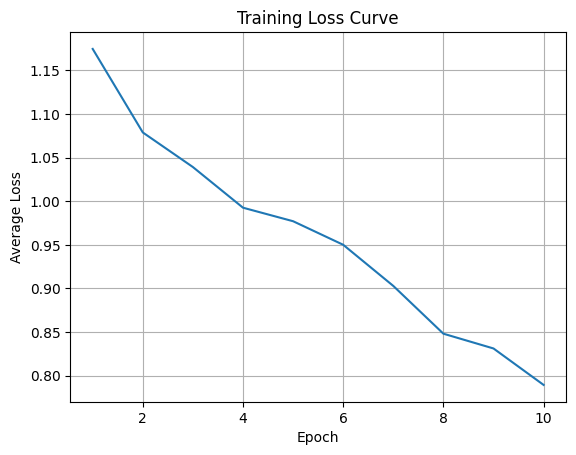

In [ ]:
import torch
import matplotlib.pyplot as plt

plt.plot(range(1, 11), epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

In [ ]:
import os
os.makedirs("/content/drive/MyDrive/model_quick")

In [ ]:
model.save_pretrained("/content/drive/MyDrive/model_quick")

In [ ]:
from transformers import AutoTokenizer, Blip2Model

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoProcessor, Blip2ForConditionalGeneration

# 학습된 가중치 저장
model_save_path = '/content/drive/MyDrive/quickdraw+sketchscene_model.pth'
torch.save(model.state_dict(), model_save_path)

print("모델 학습 및 가중치 저장이 완료되었습니다.")

모델 학습 및 가중치 저장이 완료되었습니다.


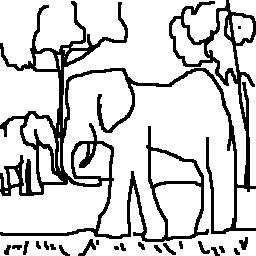

In [ ]:
example = dataset[188]
image = example["image"]
image

In [ ]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
pixel_values = inputs.pixel_values

# Generate Caption -> using trained (finetuned) blip-2 model
generated_ids = model.generate(pixel_values=pixel_values, max_length=25)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

Elephants walking in the jungle


In [ ]:
stopwords= ['drawn in', 'drawing ', 'sketch ', 'draw ', 'doodle ', 'a drawing', 'a doodle', 'on a white background', 'white background', 'drew']

In [ ]:
import re
pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, stopwords)) + r')\b', re.IGNORECASE); pattern
prompt = "A photo of " + pattern.sub('', generated_caption).strip(); prompt

'A photo of Elephants walking in the jungle'

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# uncomment to install the necessary libraries in Colab
!pip install diffusers transformers ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.0 MB/s eta 0:00:00


In [ ]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion",
                                                torch_dtype=torch.float16).to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


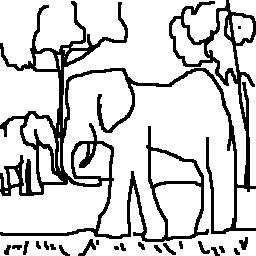

In [ ]:
example = dataset[188]
image_sketch = example["image"].convert("RGB")
image_sketch

In [ ]:
generator

  0%|          | 0/47 [00:00<?, ?it/s]

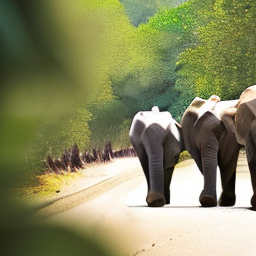

In [ ]:
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=image_sketch, strength=0.95, guidance_scale= 10.5, generator=generator).images[0]
image

  0%|          | 0/47 [00:00<?, ?it/s]

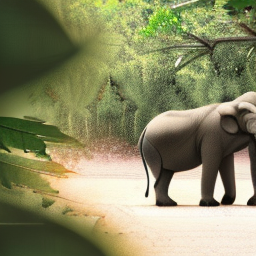

In [ ]:
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=image_sketch, strength=0.95, guidance_scale= 9.5, generator=generator).images[0]
image

그냥 stable diffusion (Text to image)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
pip install  diffusers

In [ ]:
from diffusers import DiffusionPipeline

In [ ]:
generator = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
prompt

'A photo of Elephants walking in the jungle'

In [ ]:
image = generator(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

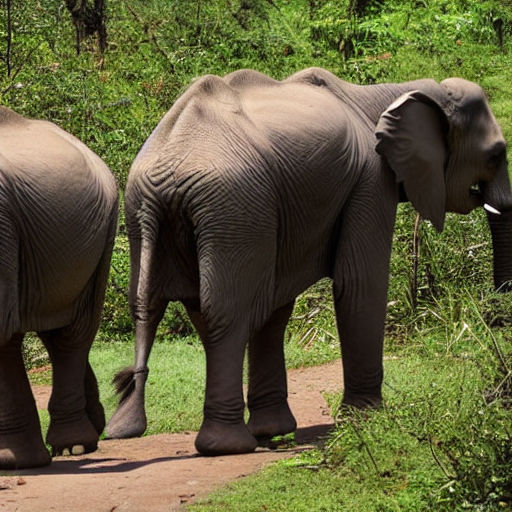

In [ ]:
image